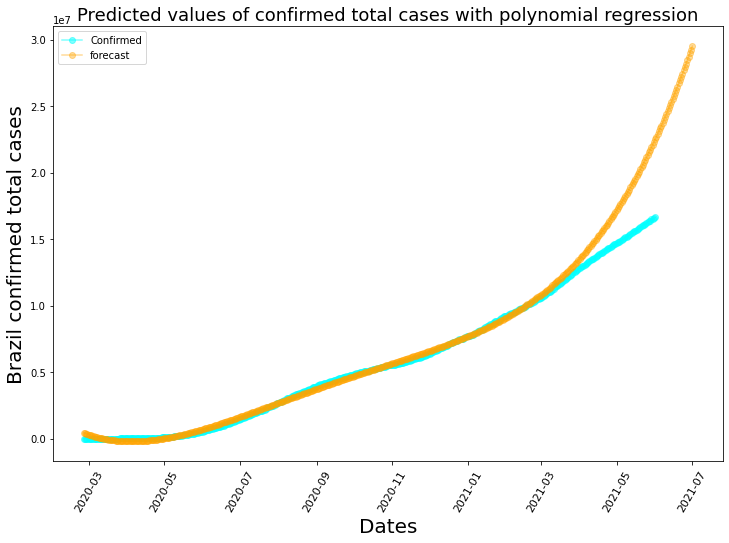

In [ ]:
!pip install -q sklearn
from __future__ import absolute_import, division, print_function, unicode_literals
from datetime import datetime,timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
%matplotlib inline
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error

covid19_world=pd.read_csv('https://raw.githubusercontent.com/kiendapoet/covid19_DS_Asignment/main/Brazil.csv')

# print(covid19_world.shape[0])

covid19_world['date'] = pd.to_datetime(covid19_world['date'])

numbers_of_dates = covid19_world.index.values.reshape(-1, 1)
future_days = 30
numbers_start_to_futures = np.array([i for i in range(covid19_world.shape[0]+future_days)]).reshape(-1, 1)
first_date = covid19_world['date'].tolist()[0]
first_date=pd.to_datetime(first_date)
dates_start_to_futures = pd.Series([(first_date + timedelta(days=i)) for i in range(len(numbers_start_to_futures))])


X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(numbers_of_dates[0:],covid19_world['total_cases'][0:].values,test_size = 0.2, shuffle=False)


poly_features=PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly_features.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly_features.fit_transform(X_test_confirmed)
poly_future_forecast = poly_features.fit_transform(numbers_start_to_futures[0:])
# fit a Linear Regression model
lin_reg=LinearRegression(normalize=True, fit_intercept=False)
lin_reg.fit(poly_X_train_confirmed,y_train_confirmed)
poly_pred = lin_reg.predict(poly_future_forecast)

dates = dates_start_to_futures[0:-30]
world_df=covid19_world.iloc[0:,:]
plt.figure(figsize= (12,8))
plt.xticks(rotation = 60 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Brazil confirmed total cases',fontsize = 20)
plt.title("Predicted values of confirmed total cases with polynomial regression",fontsize = 18)
plt.plot_date(y= world_df['total_cases'].values, x= dates, label = 'Confirmed',alpha=0.5,linestyle ='-',color = 'cyan')
plt.plot_date(y= poly_pred,x= dates_start_to_futures[0:],label = 'forecast',alpha=0.4,linestyle ='-',color = 'orange')
plt.legend()